In [1]:
!pip install glob2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import glob2
import PIL
from tqdm import tqdm
import cv2
import numpy as np
import shutil

In [3]:
try:
    import Image
except ImportError:
    from PIL import Image

(880, 1280, 3)

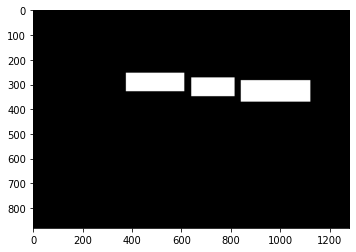

In [4]:
im = plt.imread('./first.png')
im = im*255
plt.imshow(im)
im.shape

In [9]:
data = pd.read_csv('./dataset.csv')  #load the dataset
data

,imageName,tags,labels,x1,y1,x2,y2,joint,imagewidth,imageheight
0,img/14_03.jpg,LIVING,"{'height': '75', 'width': '236', 'x': '375', '...",375,253,611,328,./svt/svt1/img/14_03.jpg,1280,880
1,img/14_03.jpg,ROOM,"{'height': '76', 'width': '175', 'x': '639', '...",639,272,814,348,./svt/svt1/img/14_03.jpg,1280,880
2,img/14_03.jpg,THEATERS,"{'height': '87', 'width': '281', 'x': '839', '...",839,283,1120,370,./svt/svt1/img/14_03.jpg,1280,880
3,img/14_04.jpg,INSURANCE,"{'height': '64', 'width': '366', 'x': '571', '...",571,344,937,408,./svt/svt1/img/14_04.jpg,1276,884
4,img/14_04.jpg,STANDARD,"{'height': '84', 'width': '354', 'x': '180', '...",180,310,534,394,./svt/svt1/img/14_04.jpg,1276,884
...,...,...,...,...,...,...,...,...,...,...
252,img/11_11.jpg,CENTER,"{'height': '41', 'width': '95', 'x': '722', 'y...",722,332,817,373,./svt/svt1/img/11_11.jpg,1280,800
253,img/11_11.jpg,PERFORMING,"{'height': '36', 'width': '131', 'x': '528', '...",528,331,659,367,./svt/svt1/img/11_11.jpg,1280,800
254,img/11_11.jpg,ORLANDO,"{'height': '23', 'width': '67', 'x': '521', 'y...",521,391,588,414,./svt/svt1/img/11_11.jpg,1280,800
255,img/04_16.jpg,BLOCKBUSTER,"{'height': '61', 'width': '281', 'x': '467', '...",467,497,748,558,./svt/svt1/img/04_16.jpg,1280,1024


In [ ]:
def dataforQuadGeo(dataset):

data = pd.read_csv(dataset)  #load the dataset
images = "./images"
les_noms = data['imageName'].unique().tolist()

for noms in tqdm(les_noms):
    
    split = noms.split('.')[0]

    #firstimage = data['imageName'] == 'img/14_03.jpg'
    #groupeoffirstimage = data[firstimage]
    #groupe = groupeoffirstimage.reset_index(drop=True)
    
    groupe_of_first_image = data[data['imageName'] == noms]
    groupe = groupe_of_first_image.reset_index(drop=True)
    

    flop = (np.zeros(((groupe.iloc[0, 9]), (groupe.iloc[0, 8]))))

    for f in range(len(groupe)):




        #flop[(groupe.iloc[0, 4]):(groupe.iloc[0, 6]), (groupe.iloc[0, 3]):(groupe.iloc[0, 5])] = 1
        #flop[310:394, 180:534] = 1
        clop = np.zeros((((groupe.iloc[f, 6]) - (groupe.iloc[f, 4])), ((groupe.iloc[f, 5]) - (groupe.iloc[f, 3]))))

        for i in range((groupe.iloc[f, 6]) - (groupe.iloc[f, 4])):
            for e in range((groupe.iloc[f, 5]) - (groupe.iloc[f, 3])):

                a = np.array((0,0))
                b = np.array((i,e))

                clop[i][e] = np.linalg.norm(a-b)

        flop[(groupe.iloc[f, 4]):(groupe.iloc[f, 6]), (groupe.iloc[f, 3]):(groupe.iloc[f, 5])] = clop

    #flop.tofile('./14_03.dat')
    np.savetxt(f'{images}/{split}.txt', flop, fmt='%f')
    np.savetxt('./14_03.txt', flop, fmt='%f')
    #f'{images}/{split}.txt'

    plt.imshow(flop)
    plt.show()

In [44]:
b = np.loadtxt('./14_03.txt', dtype=float)
b == flop

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [21]:
clop = np.zeros((((groupe.iloc[0, 6]) - (groupe.iloc[0, 4])), ((groupe.iloc[0, 5]) - (groupe.iloc[0, 3]))))

In [22]:
clop.shape

(75, 236)

In [24]:
clop[0][0]

0.0

In [25]:
epl = np.zeros((75,236))

for i in range(75):
    for e in range(236):
        
        a = np.array((0,0))
        b = np.array((i,e))
        
        epl[i][e] = np.linalg.norm(a-b)

In [26]:
epl

array([[  0.        ,   1.        ,   2.        , ..., 233.        ,
        234.        , 235.        ],
       [  1.        ,   1.41421356,   2.23606798, ..., 233.00214591,
        234.00213674, 235.00212765],
       [  2.        ,   2.23606798,   2.82842712, ..., 233.00858353,
        234.00854685, 235.00851048],
       ...,
       [ 72.        ,  72.00694411,  72.02777242, ..., 243.87086747,
        244.82646916, 245.78242411],
       [ 73.        ,  73.00684899,  73.02739212, ..., 244.16797497,
        245.1224184 , 246.07722365],
       [ 74.        ,  74.00675645,  74.02702209, ..., 244.46881192,
        245.4220854 , 246.37572932]])

In [28]:
epl.shape

(75, 236)

In [18]:
epl = np.zeros(((328-253), (611-375))) 
epl.shape

(75, 236)

In [19]:
groupe.iloc[0, 6]

408

In [27]:
elip = (np.zeros(((groupe.iloc[0, 9]), (groupe.iloc[0, 8]))))

In [29]:
elip[(groupe.iloc[0, 4]):(groupe.iloc[0, 6]), (groupe.iloc[0, 3]):(groupe.iloc[0, 5])] = epl

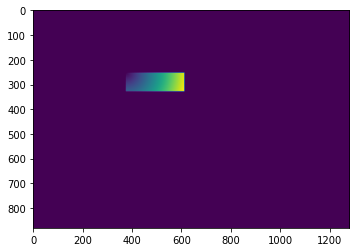

In [30]:
plt.imshow(elip)
plt.show()

In [154]:



'''
@uthor: me_teor21
d@te: 12/01/2021
'''




def dataforQuadGeo(dataset, images):
    '''This function adapt the image dataset to the QUADGEO loss function'''
    
    data = pd.read_csv(dataset)  #load the dataset
    
    les_noms = data['imageName'].unique().tolist()  #make a list with the image names (no repetition)

    for noms in tqdm(les_noms):   #iterate over every images

        split = noms.split('.')[0]  #as image names are like img/00_00.jpg, split and store the 'img/00_00' part
        groupe_of_first_image = data[data['imageName'] == noms]  #dataframe of a each single image
        groupe = groupe_of_first_image.reset_index(drop=True)  #drop index to make it start from 0


        flop = (np.zeros((4, (groupe.iloc[0, 9]), (groupe.iloc[0, 8]))))   #create an empty tensor of size (4, m, n) containing zeros

        for f in range(len(groupe)):  #iterate over lengths of each 'groupe'




            #create an empty block of zeros that will contain the distance from the upleft corner
            upleft = np.zeros((((groupe.iloc[f, 6]) - (groupe.iloc[f, 4])), ((groupe.iloc[f, 5]) - (groupe.iloc[f, 3]))))  
            
            #create an empty block of zeros that will contain the distance from the upright corner
            upright = np.zeros((((groupe.iloc[f, 6]) - (groupe.iloc[f, 4])), ((groupe.iloc[f, 5]) - (groupe.iloc[f, 3]))))
            
            #create an empty block of zeros that will contain the distance from the downright corner
            downright = np.zeros((((groupe.iloc[f, 6]) - (groupe.iloc[f, 4])), ((groupe.iloc[f, 5]) - (groupe.iloc[f, 3]))))
            
            #create an empty block of zeros that will contain the distance from the downleft corner
            downleft = np.zeros((((groupe.iloc[f, 6]) - (groupe.iloc[f, 4])), ((groupe.iloc[f, 5]) - (groupe.iloc[f, 3]))))



            for i in range((groupe.iloc[f, 6]) - (groupe.iloc[f, 4])):  #iterate over the row indexes
                for e in range((groupe.iloc[f, 5]) - (groupe.iloc[f, 3])):  #iterate over the column indexes

                    #coordinate of upleft
                    alpha = np.array((0,0)) 
                    
                    #coordinate of the rest
                    beta = np.array((i,e)) 
                    
                    #coordinate of upright
                    gamma = np.array((((groupe.iloc[f, 5]) - (groupe.iloc[f, 3])),0)) 
                    
                    #coordinate of downright
                    delta = np.array((((groupe.iloc[f, 5]) - (groupe.iloc[f, 3])), ((groupe.iloc[f, 6]) - (groupe.iloc[f, 4])))) 
                    lambdaa = np.array((0, ((groupe.iloc[f, 6]) - (groupe.iloc[f, 4])))) #coordinate of downleft

                    upleft[i][e] = np.linalg.norm(alpha - beta) #fill in the distances
                    upright[i][e] = np.linalg.norm(gamma - beta) #fill in the distances
                    downright[i][e] = np.linalg.norm(delta - beta) #fill in the distances
                    downleft[i][e] = np.linalg.norm(lambdaa - beta) #fill in the distances


            flop[0][(groupe.iloc[f, 4]):(groupe.iloc[f, 6]), (groupe.iloc[f, 3]):(groupe.iloc[f, 5])] = upleft  #fill in tensor
            flop[1][(groupe.iloc[f, 4]):(groupe.iloc[f, 6]), (groupe.iloc[f, 3]):(groupe.iloc[f, 5])] = upright  #fill in tensor
            flop[2][(groupe.iloc[f, 4]):(groupe.iloc[f, 6]), (groupe.iloc[f, 3]):(groupe.iloc[f, 5])] = downright  #fill in tensor
            flop[3][(groupe.iloc[f, 4]):(groupe.iloc[f, 6]), (groupe.iloc[f, 3]):(groupe.iloc[f, 5])] = downleft  #fill in tensor





        np.save(f'{images}/{split}.npy',flop)  #save each numpy array to its corresponding image name



    return



In [ ]:
def main():
    dataforQuadGeo('./dataset.csv', './images')
    
if __name__ == "__main__":
    main()

In [136]:
booo = np.load("./14_03.npy")

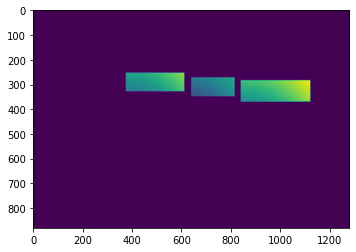

In [138]:
plt.imshow(booo[1])
plt.show()

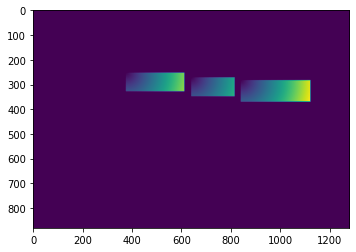

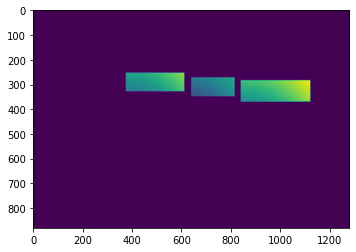

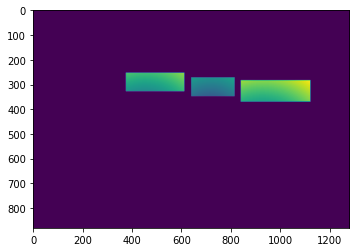

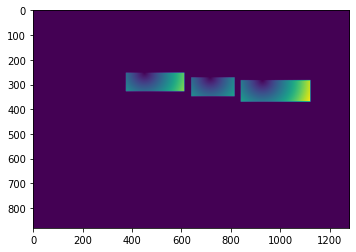

In [139]:
for w in range(4):
    plt.imshow(booo[w])
    plt.show()

In [117]:
np.zeros((4,880,1280))

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [118]:
allo = np.zeros((4,880,1280))
two = np.zeros((3,3))
three = np.ones((75,236))

In [119]:
three

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [124]:
allo[3].shape

(880, 1280)

In [128]:
allo[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
allo[1][254:329 , 375:611] = three

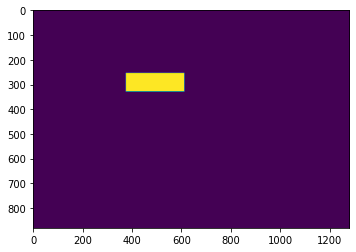

In [131]:
plt.imshow(allo[1])
plt.show()

In [90]:
allo[1][1:3 , 1:3].shape

(2, 2)